In [1]:
import pandas as pd
import numpy as np
import math
import datetime
import matplotlib.pyplot as plt
from frozenlist import FrozenList

In [2]:
# 준비작업
import pandas as pd
import numpy as np

import folium
import json

import matplotlib.pyplot as plt
%matplotlib inline

path = "c:/Windows/Fonts/malgun.ttf"
import platform
from matplotlib import font_manager, rc
if platform.system() == 'Darwin':
    rc('font', family='AppleGothic')
elif platform.system() == 'Windows':
    font_name = font_manager.FontProperties(fname=path).get_name()
    rc('font', family=font_name)
else:
    print('Unknown system... sorry~~~~')    

plt.rcParams['axes.unicode_minus'] = False

# openrate

In [3]:
normal_data_1_openrate = pd.read_excel("normal_data_1_openrate.xlsx")
normal_data_2_openrate = pd.read_excel("normal_data_2_openrate.xlsx")

In [4]:
normal_data_1_openrate.drop(['Unnamed: 0'], axis=1, inplace=True)

In [5]:
normal_data_1_openrate

,인허가일자,구,동,x,y,2015_1,2015_2,2015_3,2015_4,2016_1,...,2017_4,2018_1,2018_2,2018_3,2018_4,2019_1,2019_2,2019_3,2019_4,2020_1
0,2019-10-16,종로구,종로1.2.3.4가동,199013.621162,452566.572483,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
1,2019-10-16,종로구,옥인동,197102.594677,453154.492407,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
2,2019-10-16,종로구,종로1.2.3.4가동,198213.955223,452045.296743,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
3,2019-11-25,종로구,종로1.2.3.4가동,198984.839771,452270.384434,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
4,2019-11-25,종로구,창신동,200941.928779,452217.462765,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
40408,2018-09-28,영등포구,양평2동,190757.977577,448162.410634,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
40409,2018-09-13,영등포구,대림동,191400.318861,442715.143229,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
40410,2018-09-13,영등포구,대림동,191400.318861,442715.143229,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
40411,2018-09-13,영등포구,대림동,191400.318861,442715.143229,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0


In [6]:
normal_data_openrate = pd.concat([normal_data_1_openrate, normal_data_2_openrate])

In [7]:
normal_data_openrate

,인허가일자,구,동,x,y,2015_1,2015_2,2015_3,2015_4,2016_1,...,2018_2,2018_3,2018_4,2019_1,2019_2,2019_3,2019_4,2020_1,Unnamed: 0,Unnamed: 0.1
0,2019-10-16,종로구,종로1.2.3.4가동,199013.621162,452566.572483,0,0,0,0,0,...,0,0,0,0,0,0,1,0,NaN,NaN
1,2019-10-16,종로구,옥인동,197102.594677,453154.492407,0,0,0,0,0,...,0,0,0,0,0,0,1,0,NaN,NaN
2,2019-10-16,종로구,종로1.2.3.4가동,198213.955223,452045.296743,0,0,0,0,0,...,0,0,0,0,0,0,1,0,NaN,NaN
3,2019-11-25,종로구,종로1.2.3.4가동,198984.839771,452270.384434,0,0,0,0,0,...,0,0,0,0,0,0,1,0,NaN,NaN
4,2019-11-25,종로구,창신동,200941.928779,452217.462765,0,0,0,0,0,...,0,0,0,0,0,0,1,0,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20258,2020-02-26,강동구,천호동,211622.797810,448442.446986,0,0,0,0,0,...,0,0,0,0,0,0,0,1,20258.0,20258.0
20259,2020-03-23,강동구,천호동,212140.199270,449193.678332,0,0,0,0,0,...,0,0,0,0,0,0,0,1,20259.0,20259.0
20260,2020-01-08,강동구,길동,212852.796933,448888.595724,0,0,0,0,0,...,0,0,0,0,0,0,0,1,20260.0,20260.0
20261,2020-01-28,강동구,상일동,215167.502112,449591.100461,0,0,0,0,0,...,0,0,0,0,0,0,0,1,20261.0,20261.0


In [8]:
normal_data_openrate.reset_index(drop=True, inplace=True)

In [9]:
normal_data_openrate.to_excel("normal_data_openrate_final.xlsx")

In [10]:
normal_data_openrate.drop(['Unnamed: 0'], axis=1, inplace=True)

In [11]:
normal_data_openrate

,인허가일자,구,동,x,y,2015_1,2015_2,2015_3,2015_4,2016_1,...,2018_1,2018_2,2018_3,2018_4,2019_1,2019_2,2019_3,2019_4,2020_1,Unnamed: 0.1
0,2019-10-16,종로구,종로1.2.3.4가동,199013.621162,452566.572483,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,NaN
1,2019-10-16,종로구,옥인동,197102.594677,453154.492407,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,NaN
2,2019-10-16,종로구,종로1.2.3.4가동,198213.955223,452045.296743,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,NaN
3,2019-11-25,종로구,종로1.2.3.4가동,198984.839771,452270.384434,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,NaN
4,2019-11-25,종로구,창신동,200941.928779,452217.462765,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
60671,2020-02-26,강동구,천호동,211622.797810,448442.446986,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,20258.0
60672,2020-03-23,강동구,천호동,212140.199270,449193.678332,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,20259.0
60673,2020-01-08,강동구,길동,212852.796933,448888.595724,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,20260.0
60674,2020-01-28,강동구,상일동,215167.502112,449591.100461,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,20261.0


In [12]:
normal_open_group = normal_data_openrate.groupby([normal_data_openrate.구,normal_data_openrate.동])[['2015_1','2015_2','2015_3','2015_4','2016_1','2016_2','2016_3','2016_4','2017_1','2017_2','2017_3','2017_4','2018_1','2018_2','2018_3','2018_4','2019_1','2019_2','2019_3','2019_4','2020_1']].sum()

In [13]:
normal_open_group

2015_1  2015_2  2015_3  2015_4  2016_1  2016_2  2016_3  2016_4  \
구   동                                                                     
강남구 개포동       8      16      10      10       2       9       7      10   
    논현동      36      56      53      46      47      59      45      48   
    대치동      23      38      21      41      28      34      24      42   
    도곡동      12      11      15      15      11       9      10      10   
    삼성동      20      21      36      39      25      33      44      30   
...         ...     ...     ...     ...     ...     ...     ...     ...   
중랑구 면목동      18      28      24      23      29      27      17      21   
    묵동        7      11      10      10       6       9       8      10   
    상봉동      11       8       9       7       7       4       8      14   
    신내동       5      11       7       7       6      10       6       7   
    중화동       6      11       8       9       9      13       7       8   

         2017_1  2017_2  ...  2017_4  2018_1  2018_2  2018_3  2018_4  2019_1  \
구   동                    ...                                                   
강남구 개포동      10      11  ...      12       3       3       6      11       9   
    논현동      48      58  ...      48      39      55      52      46      43   
    대치동      28      33  ...      20      31      41      27      48      37   
    도곡동      11       7  ...      11       8      15       3      22      12   
    삼성동      31      49  ...      54      21      66      22      48      36   
...         ...     ...  ...     ...     ...     ...     ...     ...     ...   
중랑구 면목동      24      26  ...      24      21      36      26      27      29   
    묵동        9       3  ...       5       6      11       8       9      10   
    상봉동      10      14  ...       8       7      12       9       5      10   
    신내동       7      10  ...       4       2       6       9       7       3   
    중화동       7       6  ...      10       5       8       6      10      11   

         2019_2  2019_3  2019_4  2020_1  
구   동                                    
강남구 개포동       5       5       6      10  
    논현동      75      75      68      76  
    대치동      38      37      32      21  
    도곡동      16      11      13       5  
    삼성동      49      44      44      35  
...         ...     ...     ...     ...  
중랑구 면목동      31      21      30      14  
    묵동        7      13      10       8  
    상봉동      12      13      12       9  
    신내동       5      11       6       6  
    중화동      14       6       6      10  

[279 rows x 21 columns]

In [14]:
normal_open_group_cnt = normal_data_openrate.groupby([normal_data_openrate.구,normal_data_openrate.동])['동'].count().to_frame()

In [15]:
normal_open_group_cnt = normal_open_group_cnt.rename(columns={'동':'count'})
normal_open_group_cnt

count
구   동         
강남구 개포동    168
    논현동   1135
    대치동    687
    도곡동    238
    삼성동    784
...        ...
중랑구 면목동    519
    묵동     181
    상봉동    201
    신내동    144
    중화동    173

[279 rows x 1 columns]

In [16]:
normal_open_group_cnt.index[1]

('강남구', '논현동')

In [17]:
# for문 2개 필요 (아래로 내려가는 for, 옆으로 가는 for)
# normal_open_group 인덱스값이 normal_open_group_cnt 인덱스값과 일치하면 해당 행의 값을 돌면서 개업률을 계산한다.
rowcnt1 = normal_open_group.index.tolist()
rowcnt2 = normal_open_group_cnt.index.tolist()

def calopenrate(i,j):
    for k in range(0,21):
        normal_open_group.iloc[i,k] = round(((normal_open_group.iloc[i,k]/normal_open_group_cnt.iloc[j,0])*100),2)

def vlookup():
    for i in range(0,len(rowcnt1)):
        for j in range(0,len(rowcnt2)):
            if (rowcnt1[i][1] == rowcnt2[j][1]):
                return calopenrate(i,j)
vlookup()
normal_open_group

2015_1  2015_2  2015_3  2015_4  2016_1  2016_2  2016_3  2016_4  \
구   동                                                                     
강남구 개포동    4.76    9.52    5.95    5.95    1.19    5.36    4.17    5.95   
    논현동   36.00   56.00   53.00   46.00   47.00   59.00   45.00   48.00   
    대치동   23.00   38.00   21.00   41.00   28.00   34.00   24.00   42.00   
    도곡동   12.00   11.00   15.00   15.00   11.00    9.00   10.00   10.00   
    삼성동   20.00   21.00   36.00   39.00   25.00   33.00   44.00   30.00   
...         ...     ...     ...     ...     ...     ...     ...     ...   
중랑구 면목동   18.00   28.00   24.00   23.00   29.00   27.00   17.00   21.00   
    묵동     7.00   11.00   10.00   10.00    6.00    9.00    8.00   10.00   
    상봉동   11.00    8.00    9.00    7.00    7.00    4.00    8.00   14.00   
    신내동    5.00   11.00    7.00    7.00    6.00   10.00    6.00    7.00   
    중화동    6.00   11.00    8.00    9.00    9.00   13.00    7.00    8.00   

         2017_1  2017_2  ...  2017_4  2018_1  2018_2  2018_3  2018_4  2019_1  \
구   동                    ...                                                   
강남구 개포동    5.95    6.55  ...    7.14    1.79    1.79    3.57    6.55    5.36   
    논현동   48.00   58.00  ...   48.00   39.00   55.00   52.00   46.00   43.00   
    대치동   28.00   33.00  ...   20.00   31.00   41.00   27.00   48.00   37.00   
    도곡동   11.00    7.00  ...   11.00    8.00   15.00    3.00   22.00   12.00   
    삼성동   31.00   49.00  ...   54.00   21.00   66.00   22.00   48.00   36.00   
...         ...     ...  ...     ...     ...     ...     ...     ...     ...   
중랑구 면목동   24.00   26.00  ...   24.00   21.00   36.00   26.00   27.00   29.00   
    묵동     9.00    3.00  ...    5.00    6.00   11.00    8.00    9.00   10.00   
    상봉동   10.00   14.00  ...    8.00    7.00   12.00    9.00    5.00   10.00   
    신내동    7.00   10.00  ...    4.00    2.00    6.00    9.00    7.00    3.00   
    중화동    7.00    6.00  ...   10.00    5.00    8.00    6.00   10.00   11.00   

         2019_2  2019_3  2019_4  2020_1  
구   동                                    
강남구 개포동    2.98    2.98    3.57    5.95  
    논현동   75.00   75.00   68.00   76.00  
    대치동   38.00   37.00   32.00   21.00  
    도곡동   16.00   11.00   13.00    5.00  
    삼성동   49.00   44.00   44.00   35.00  
...         ...     ...     ...     ...  
중랑구 면목동   31.00   21.00   30.00   14.00  
    묵동     7.00   13.00   10.00    8.00  
    상봉동   12.00   13.00   12.00    9.00  
    신내동    5.00   11.00    6.00    6.00  
    중화동   14.00    6.00    6.00   10.00  

[279 rows x 21 columns]

In [18]:
normal_open_group_rate = normal_open_group

In [19]:
stacked_openrate = normal_open_group_rate.stack().to_frame()
stacked_openrate = stacked_openrate.rename(columns={0:'openrate'})
stacked_openrate

openrate
구   동                   
강남구 개포동 2015_1      4.76
        2015_2      9.52
        2015_3      5.95
        2015_4      5.95
        2016_1      1.19
...                  ...
중랑구 중화동 2019_1     11.00
        2019_2     14.00
        2019_3      6.00
        2019_4      6.00
        2020_1     10.00

[5859 rows x 1 columns]

In [20]:
stacked_openrate.index.names = ['gu','dong','year_quarter']

In [21]:
stacked_openrate

openrate
gu  dong year_quarter          
강남구 개포동  2015_1            4.76
         2015_2            9.52
         2015_3            5.95
         2015_4            5.95
         2016_1            1.19
...                         ...
중랑구 중화동  2019_1           11.00
         2019_2           14.00
         2019_3            6.00
         2019_4            6.00
         2020_1           10.00

[5859 rows x 1 columns]

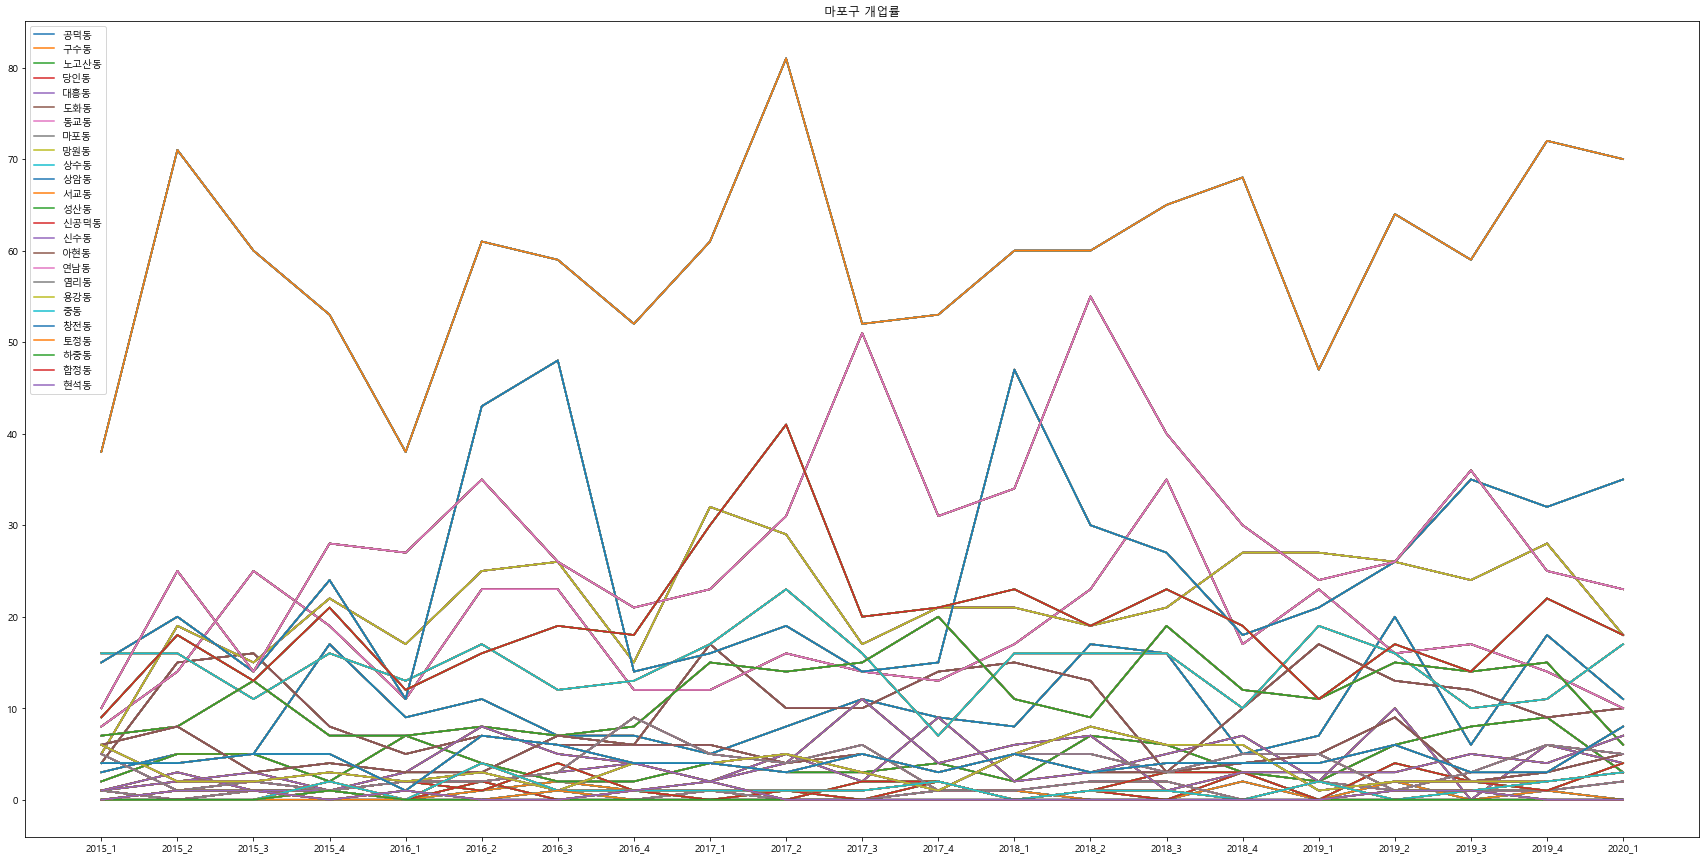

In [22]:
def uniquedong(gu):
    b = stacked_openrate.index.tolist()
    c = [b[0][1]]
    index = 0
    d = b[0][1]
    for j in b:
        if j[0]==gu:
            if d==j[1]:
                continue
            else:
                d = j[1]
                c.append(j[1])
            index = b.index(j)
        else:
            continue
    c.pop(0)        
    return (c)

def drawgraphgu(gu):
    a = stacked_openrate.index.tolist()
    plt.figure(figsize=(30,15))
    dongcount = 0
    for i in a:
        if (i[0]==gu):
            data = stacked_openrate.loc[i[0],i[1]]
            plt.plot(data.index, data.values)
        else:
            continue
    plt.title(gu+" 개업률")
    plt.legend(uniquedong(gu))
    plt.show()
drawgraphgu('마포구')

# closedrate

In [23]:
normal_data_1_closedrate = pd.read_excel("normal_data_1_closedrate.xlsx")
normal_data_2_closedrate = pd.read_excel("normal_data_2_closedrate.xlsx")

In [24]:
normal_data_1_closedrate

,Unnamed: 0,폐업일자,구,동,x,y,2015_1,2015_2,2015_3,2015_4,...,2017_4,2018_1,2018_2,2018_3,2018_4,2019_1,2019_2,2019_3,2019_4,2020_1
0,0,NaT,종로구,종로1.2.3.4가동,199013.621162,452566.572483,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1,NaT,종로구,옥인동,197102.594677,453154.492407,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,2,NaT,종로구,종로1.2.3.4가동,198213.955223,452045.296743,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,3,NaT,종로구,종로1.2.3.4가동,198984.839771,452270.384434,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,4,NaT,종로구,창신동,200941.928779,452217.462765,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
40408,40408,2020-01-22,영등포구,양평2동,190757.977577,448162.410634,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
40409,40409,2020-06-09,영등포구,대림동,191400.318861,442715.143229,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
40410,40410,2020-06-09,영등포구,대림동,191400.318861,442715.143229,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
40411,40411,2020-06-09,영등포구,대림동,191400.318861,442715.143229,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [25]:
normal_data_2_closedrate

,Unnamed: 0,Unnamed: 0.1,폐업일자,구,동,x,y,2015_1,2015_2,2015_3,...,2017_4,2018_1,2018_2,2018_3,2018_4,2019_1,2019_2,2019_3,2019_4,2020_1
0,0,0,2016-06-13,영등포구,대림동,191278.710050,443010.178826,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1,1,2019-02-07,영등포구,영등포본동,192528.874392,445886.964371,0,0,0,...,0,0,0,0,0,1,0,0,0,0
2,2,2,2019-01-11,영등포구,영등포본동,191639.692088,444835.060108,0,0,0,...,0,0,0,0,0,1,0,0,0,0
3,3,3,2019-07-22,영등포구,영등포동,191616.285409,446238.776341,0,0,0,...,0,0,0,0,0,0,0,1,0,0
4,4,4,2016-03-17,영등포구,당산1동,190472.661984,446821.615080,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20258,20258,20357,2020-06-09,강동구,천호동,211622.797810,448442.446986,0,0,0,...,0,0,0,0,0,0,0,0,0,0
20259,20259,20358,2020-07-08,강동구,천호동,212140.199270,449193.678332,0,0,0,...,0,0,0,0,0,0,0,0,0,0
20260,20260,20359,2020-03-02,강동구,길동,212852.796933,448888.595724,0,0,0,...,0,0,0,0,0,0,0,0,0,1
20261,20261,20360,2020-06-18,강동구,상일동,215167.502112,449591.100461,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [26]:
normal_data_closedrate = pd.concat([normal_data_1_closedrate, normal_data_2_closedrate])
normal_data_closedrate

,Unnamed: 0,폐업일자,구,동,x,y,2015_1,2015_2,2015_3,2015_4,...,2018_1,2018_2,2018_3,2018_4,2019_1,2019_2,2019_3,2019_4,2020_1,Unnamed: 0.1
0,0,NaT,종로구,종로1.2.3.4가동,199013.621162,452566.572483,0,0,0,0,...,0,0,0,0,0,0,0,0,0,NaN
1,1,NaT,종로구,옥인동,197102.594677,453154.492407,0,0,0,0,...,0,0,0,0,0,0,0,0,0,NaN
2,2,NaT,종로구,종로1.2.3.4가동,198213.955223,452045.296743,0,0,0,0,...,0,0,0,0,0,0,0,0,0,NaN
3,3,NaT,종로구,종로1.2.3.4가동,198984.839771,452270.384434,0,0,0,0,...,0,0,0,0,0,0,0,0,0,NaN
4,4,NaT,종로구,창신동,200941.928779,452217.462765,0,0,0,0,...,0,0,0,0,0,0,0,0,0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20258,20258,2020-06-09,강동구,천호동,211622.797810,448442.446986,0,0,0,0,...,0,0,0,0,0,0,0,0,0,20357.0
20259,20259,2020-07-08,강동구,천호동,212140.199270,449193.678332,0,0,0,0,...,0,0,0,0,0,0,0,0,0,20358.0
20260,20260,2020-03-02,강동구,길동,212852.796933,448888.595724,0,0,0,0,...,0,0,0,0,0,0,0,0,1,20359.0
20261,20261,2020-06-18,강동구,상일동,215167.502112,449591.100461,0,0,0,0,...,0,0,0,0,0,0,0,0,0,20360.0


In [27]:
normal_data_closedrate.reset_index(drop=True, inplace=True)
normal_data_closedrate.drop(['Unnamed: 0'], axis=1, inplace=True)
normal_data_closedrate

,폐업일자,구,동,x,y,2015_1,2015_2,2015_3,2015_4,2016_1,...,2018_1,2018_2,2018_3,2018_4,2019_1,2019_2,2019_3,2019_4,2020_1,Unnamed: 0.1
0,NaT,종로구,종로1.2.3.4가동,199013.621162,452566.572483,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,NaN
1,NaT,종로구,옥인동,197102.594677,453154.492407,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,NaN
2,NaT,종로구,종로1.2.3.4가동,198213.955223,452045.296743,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,NaN
3,NaT,종로구,종로1.2.3.4가동,198984.839771,452270.384434,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,NaN
4,NaT,종로구,창신동,200941.928779,452217.462765,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
60671,2020-06-09,강동구,천호동,211622.797810,448442.446986,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,20357.0
60672,2020-07-08,강동구,천호동,212140.199270,449193.678332,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,20358.0
60673,2020-03-02,강동구,길동,212852.796933,448888.595724,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,20359.0
60674,2020-06-18,강동구,상일동,215167.502112,449591.100461,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,20360.0


In [28]:
normal_closed_group = normal_data_closedrate.groupby([normal_data_closedrate.구,normal_data_closedrate.동])[['2015_1','2015_2','2015_3','2015_4','2016_1','2016_2','2016_3','2016_4','2017_1','2017_2','2017_3','2017_4','2018_1','2018_2','2018_3','2018_4','2019_1','2019_2','2019_3','2019_4','2020_1']].sum()

In [29]:
normal_closed_group

2015_1  2015_2  2015_3  2015_4  2016_1  2016_2  2016_3  2016_4  \
구   동                                                                     
강남구 개포동       0       1       2       0       1       2       1       2   
    논현동       1       3       1       5       4      11      10      14   
    대치동       0       1       0       0       3       5       8      10   
    도곡동       2       0       0       2       1       2       0       3   
    삼성동       0       0       2      10       6       4       8      13   
...         ...     ...     ...     ...     ...     ...     ...     ...   
중랑구 면목동       0       2       0       2       3       6       1       7   
    묵동        0       0       2       0       1       1       1       0   
    상봉동       0       0       1       0       2       1       1       0   
    신내동       0       0       0       0       1       1       2       1   
    중화동       0       0       0       1       2       1       1       3   

         2017_1  2017_2  ...  2017_4  2018_1  2018_2  2018_3  2018_4  2019_1  \
구   동                    ...                                                   
강남구 개포동       2       3  ...       2       1       2       7       3       5   
    논현동      12      14  ...      20      12      23      16      16      20   
    대치동      11       8  ...       9      11      11       8      14       7   
    도곡동       3       1  ...       4       2       8       2       7       3   
    삼성동       6      31  ...      20      14      37      10      27      16   
...         ...     ...  ...     ...     ...     ...     ...     ...     ...   
중랑구 면목동       7       6  ...       4       9       7       7       5      10   
    묵동        5       0  ...       2       4       2       3       4       1   
    상봉동       1       4  ...       3       1       2       3       2       3   
    신내동       0       0  ...       2       3       2       3       5       3   
    중화동       1       4  ...       3       4       2       1       7       6   

         2019_2  2019_3  2019_4  2020_1  
구   동                                    
강남구 개포동       7       3       3      10  
    논현동      32      27      33      36  
    대치동      22      13       4      21  
    도곡동      10       5       3       6  
    삼성동      42      13      26      26  
...         ...     ...     ...     ...  
중랑구 면목동       9      10       5      12  
    묵동        4       4       4       2  
    상봉동       3       7       4       3  
    신내동       1       3       4       3  
    중화동       4       2       3       6  

[279 rows x 21 columns]

In [30]:
normal_closed_group_cnt = normal_data_closedrate.groupby([normal_data_closedrate.구,normal_data_closedrate.동])['동'].count().to_frame()

In [31]:
normal_closed_group_cnt = normal_closed_group_cnt.rename(columns={'동':'count'})
normal_closed_group_cnt

count
구   동         
강남구 개포동    168
    논현동   1135
    대치동    687
    도곡동    238
    삼성동    784
...        ...
중랑구 면목동    519
    묵동     181
    상봉동    201
    신내동    144
    중화동    173

[279 rows x 1 columns]

In [32]:
# for문 2개 필요 (아래로 내려가는 for, 옆으로 가는 for)
# normal_open_group 인덱스값이 normal_open_group_cnt 인덱스값과 일치하면 해당 행의 값을 돌면서 개업률을 계산한다.
rowcnt1 = normal_closed_group.index.tolist()
rowcnt2 = normal_closed_group_cnt.index.tolist()

def calopenrate_closed(i,j):
    for k in range(0,21):
        normal_closed_group.iloc[i,k] = round(((normal_closed_group.iloc[i,k]/normal_closed_group_cnt.iloc[j,0])*100),2)

def vlookup_closed():
    for i in range(0,len(rowcnt1)):
        for j in range(0,len(rowcnt2)):
            if (rowcnt1[i][1] == rowcnt2[j][1]):
                return calopenrate_closed(i,j)
vlookup_closed()
normal_closed_group

2015_1  2015_2  2015_3  2015_4  2016_1  2016_2  2016_3  2016_4  \
구   동                                                                     
강남구 개포동     0.0     0.6    1.19     0.0     0.6    1.19     0.6    1.19   
    논현동     1.0     3.0    1.00     5.0     4.0   11.00    10.0   14.00   
    대치동     0.0     1.0    0.00     0.0     3.0    5.00     8.0   10.00   
    도곡동     2.0     0.0    0.00     2.0     1.0    2.00     0.0    3.00   
    삼성동     0.0     0.0    2.00    10.0     6.0    4.00     8.0   13.00   
...         ...     ...     ...     ...     ...     ...     ...     ...   
중랑구 면목동     0.0     2.0    0.00     2.0     3.0    6.00     1.0    7.00   
    묵동      0.0     0.0    2.00     0.0     1.0    1.00     1.0    0.00   
    상봉동     0.0     0.0    1.00     0.0     2.0    1.00     1.0    0.00   
    신내동     0.0     0.0    0.00     0.0     1.0    1.00     2.0    1.00   
    중화동     0.0     0.0    0.00     1.0     2.0    1.00     1.0    3.00   

         2017_1  2017_2  ...  2017_4  2018_1  2018_2  2018_3  2018_4  2019_1  \
구   동                    ...                                                   
강남구 개포동    1.19    1.79  ...    1.19     0.6    1.19    4.17    1.79    2.98   
    논현동   12.00   14.00  ...   20.00    12.0   23.00   16.00   16.00   20.00   
    대치동   11.00    8.00  ...    9.00    11.0   11.00    8.00   14.00    7.00   
    도곡동    3.00    1.00  ...    4.00     2.0    8.00    2.00    7.00    3.00   
    삼성동    6.00   31.00  ...   20.00    14.0   37.00   10.00   27.00   16.00   
...         ...     ...  ...     ...     ...     ...     ...     ...     ...   
중랑구 면목동    7.00    6.00  ...    4.00     9.0    7.00    7.00    5.00   10.00   
    묵동     5.00    0.00  ...    2.00     4.0    2.00    3.00    4.00    1.00   
    상봉동    1.00    4.00  ...    3.00     1.0    2.00    3.00    2.00    3.00   
    신내동    0.00    0.00  ...    2.00     3.0    2.00    3.00    5.00    3.00   
    중화동    1.00    4.00  ...    3.00     4.0    2.00    1.00    7.00    6.00   

         2019_2  2019_3  2019_4  2020_1  
구   동                                    
강남구 개포동    4.17    1.79    1.79    5.95  
    논현동   32.00   27.00   33.00   36.00  
    대치동   22.00   13.00    4.00   21.00  
    도곡동   10.00    5.00    3.00    6.00  
    삼성동   42.00   13.00   26.00   26.00  
...         ...     ...     ...     ...  
중랑구 면목동    9.00   10.00    5.00   12.00  
    묵동     4.00    4.00    4.00    2.00  
    상봉동    3.00    7.00    4.00    3.00  
    신내동    1.00    3.00    4.00    3.00  
    중화동    4.00    2.00    3.00    6.00  

[279 rows x 21 columns]

In [33]:
normal_closed_group_rate = normal_closed_group
# normal_closed_group_rate.to_excel("normal_closed_group_rate_final.xlsx")

In [34]:
stacked_closedrate = normal_closed_group_rate.stack().to_frame()
stacked_closedrate = stacked_closedrate.rename(columns={0:'closedrate'})
stacked_closedrate

closedrate
구   동                     
강남구 개포동 2015_1        0.00
        2015_2        0.60
        2015_3        1.19
        2015_4        0.00
        2016_1        0.60
...                    ...
중랑구 중화동 2019_1        6.00
        2019_2        4.00
        2019_3        2.00
        2019_4        3.00
        2020_1        6.00

[5859 rows x 1 columns]

In [35]:
stacked_closedrate.index.names = ['gu','dong','year_quarter']

In [36]:
stacked_openrate

openrate
gu  dong year_quarter          
강남구 개포동  2015_1            4.76
         2015_2            9.52
         2015_3            5.95
         2015_4            5.95
         2016_1            1.19
...                         ...
중랑구 중화동  2019_1           11.00
         2019_2           14.00
         2019_3            6.00
         2019_4            6.00
         2020_1           10.00

[5859 rows x 1 columns]

In [37]:
stacked_closedrate

closedrate
gu  dong year_quarter            
강남구 개포동  2015_1              0.00
         2015_2              0.60
         2015_3              1.19
         2015_4              0.00
         2016_1              0.60
...                           ...
중랑구 중화동  2019_1              6.00
         2019_2              4.00
         2019_3              2.00
         2019_4              3.00
         2020_1              6.00

[5859 rows x 1 columns]

# 분기별 개업률-폐업률 그래프

In [38]:
normal_OpenByClosed = pd.merge(stacked_openrate, stacked_closedrate, on=['gu','dong','year_quarter'])

In [39]:
normal_OpenByClosed

openrate  closedrate
gu  dong year_quarter                      
강남구 개포동  2015_1            4.76        0.00
         2015_2            9.52        0.60
         2015_3            5.95        1.19
         2015_4            5.95        0.00
         2016_1            1.19        0.60
...                         ...         ...
중랑구 중화동  2019_1           11.00        6.00
         2019_2           14.00        4.00
         2019_3            6.00        2.00
         2019_4            6.00        3.00
         2020_1           10.00        6.00

[5859 rows x 2 columns]

In [40]:
normal_OpenByClosed['diff'] = normal_OpenByClosed['openrate']-normal_OpenByClosed['closedrate']
normal_OpenByClosed.drop(['openrate','closedrate'],axis=1,inplace=True)

In [41]:
normal_OpenByClosed

diff
gu  dong year_quarter       
강남구 개포동  2015_1         4.76
         2015_2         8.92
         2015_3         4.76
         2015_4         5.95
         2016_1         0.59
...                      ...
중랑구 중화동  2019_1         5.00
         2019_2        10.00
         2019_3         4.00
         2019_4         3.00
         2020_1         4.00

[5859 rows x 1 columns]

In [42]:
def uniquedong_closed(gu):
    b = normal_OpenByClosed.index.tolist()
    c = [b[0][1]]
    index = 0
    d = b[0][1]
    for j in b:
        if j[0]==gu:
            if d==j[1]:
                continue
            else:
                d = j[1]
                c.append(j[1])
            index = b.index(j)
        else:
            continue
    c.pop(0)        
    return (c)

def drawgraphgu_closed(gu):
    a = normal_OpenByClosed.index.tolist()
    plt.figure(figsize=(30,15))
    dongcount = 0
    for i in a:
        if (i[0]==gu):
            data = normal_OpenByClosed.loc[i[0],i[1]]
            plt.plot(data.index, data.values)
        else:
            continue
    plt.title(gu+" 개업률-폐업률")
    plt.legend(uniquedong_closed(gu))
    plt.grid()
    plt.show()

<Figure size 2160x1080 with 0 Axes>

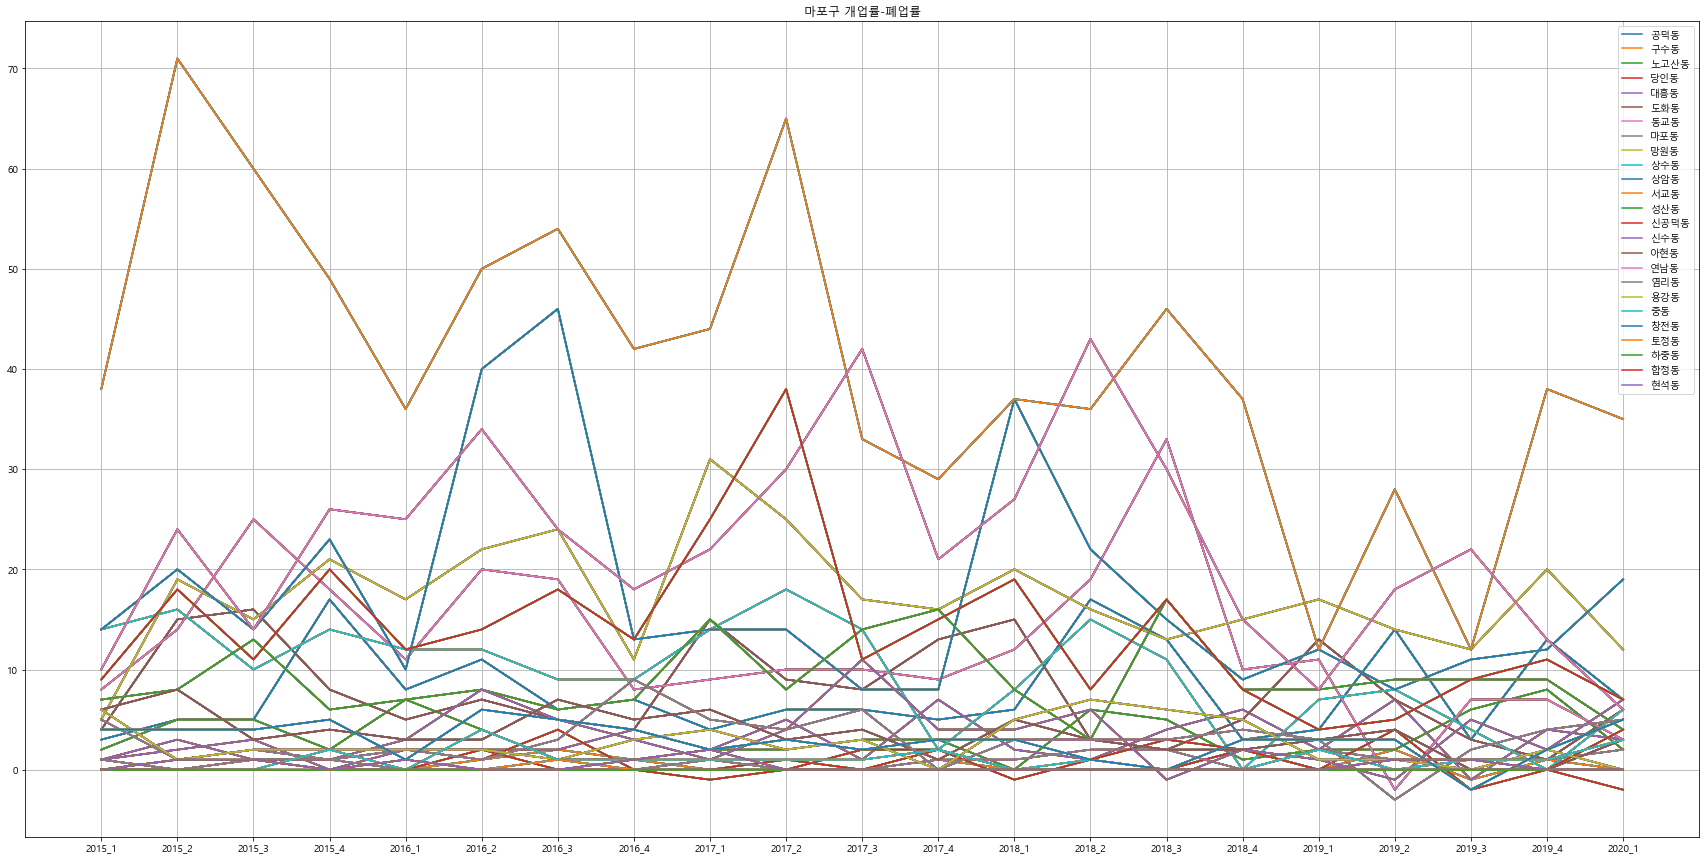

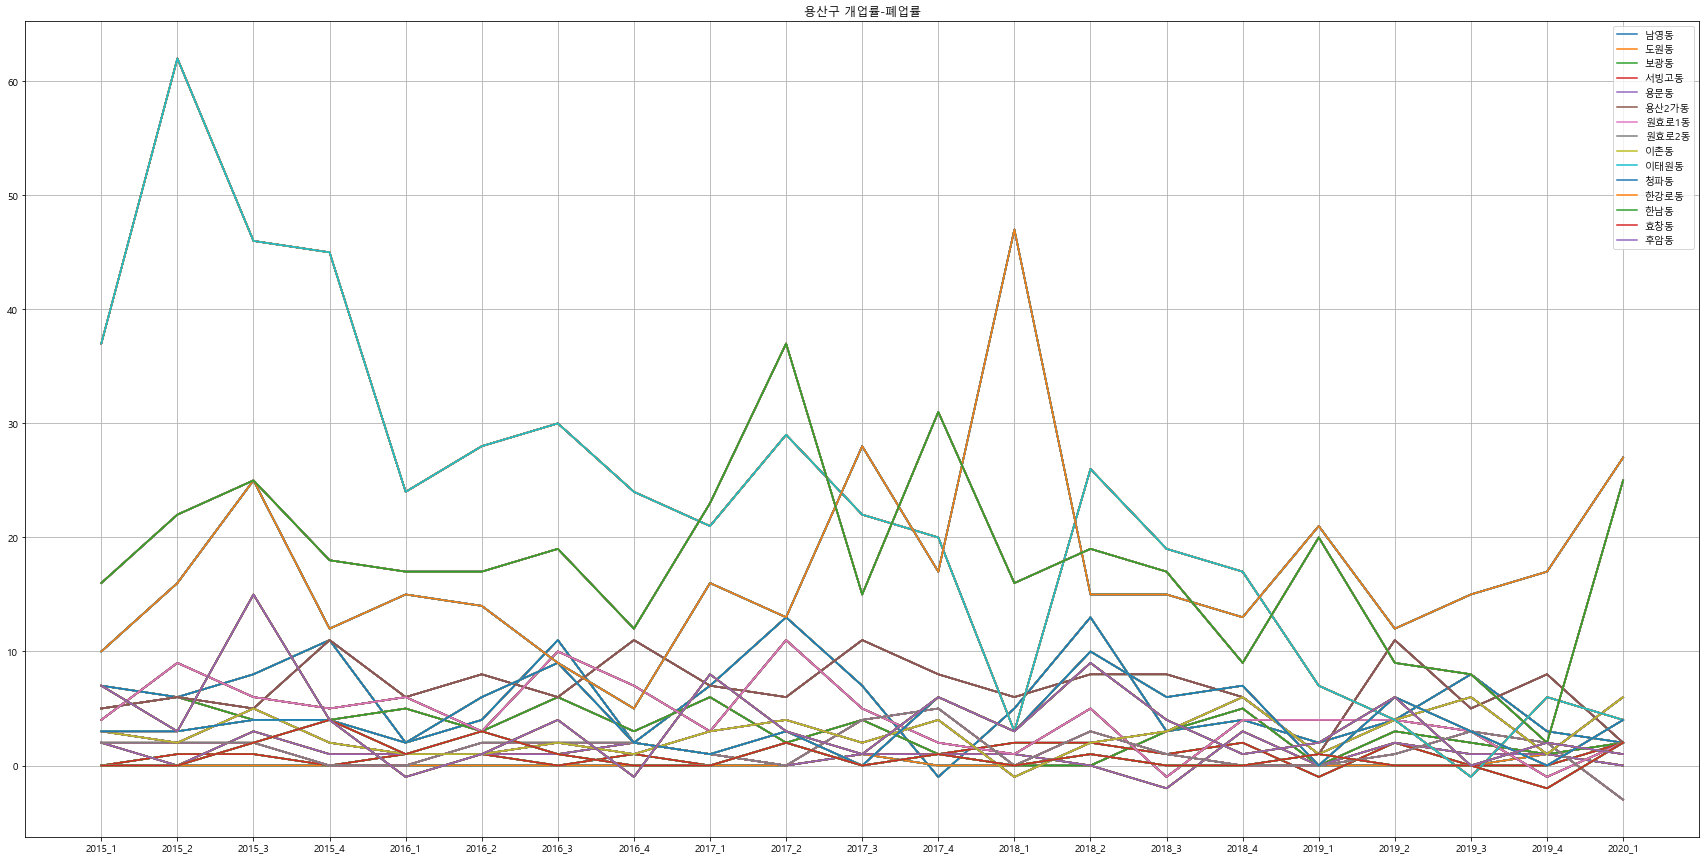

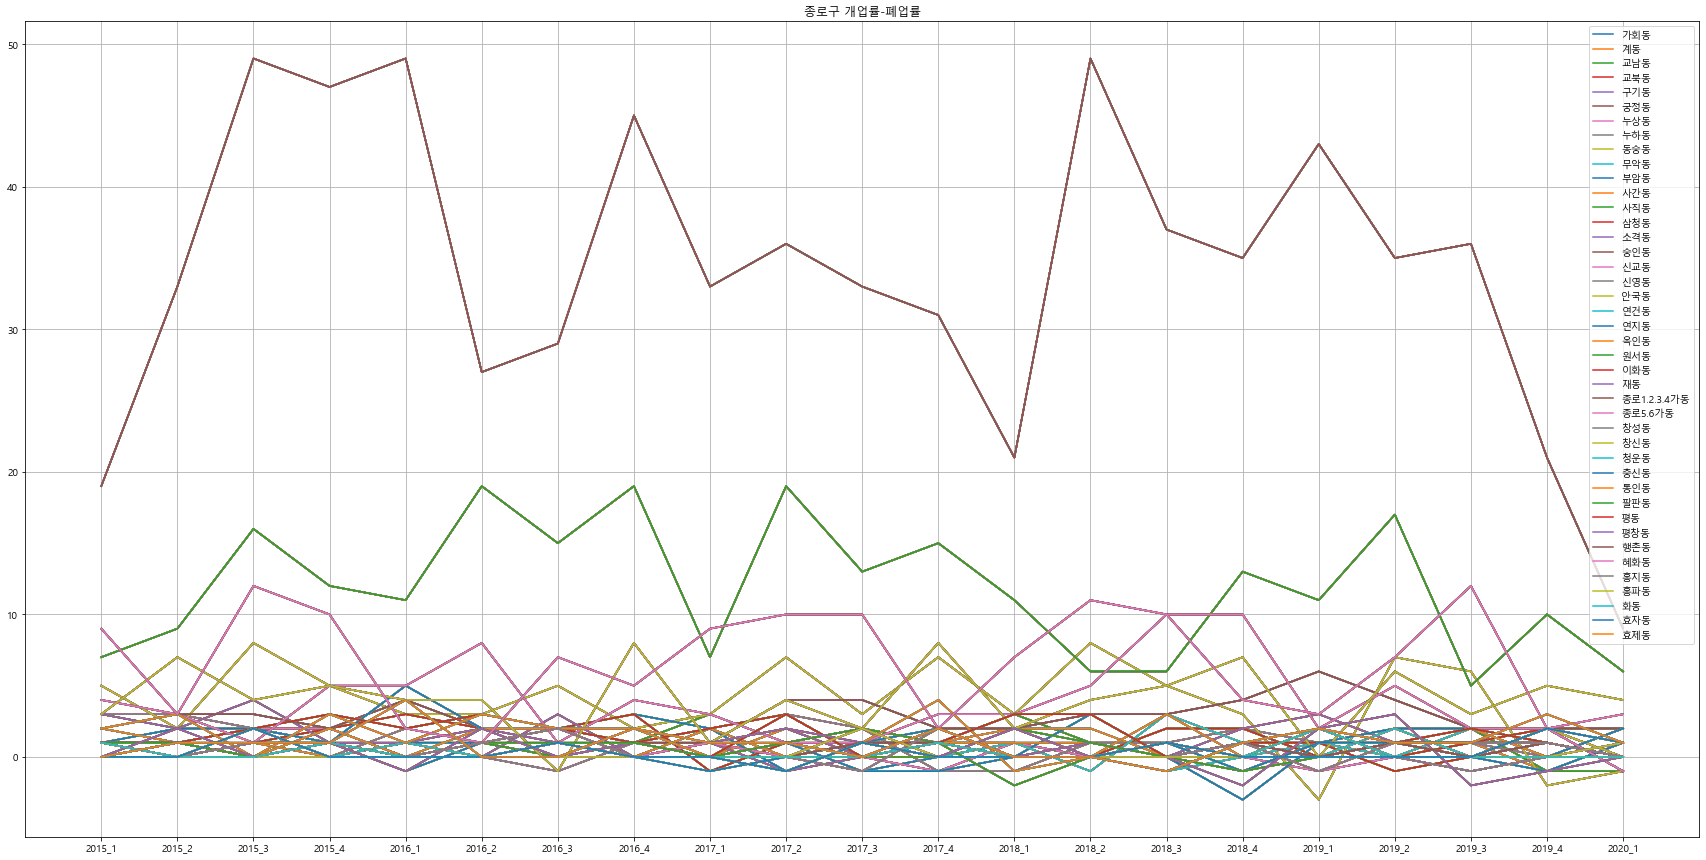

In [43]:
plt.figure(figsize=(30,15))
drawgraphgu_closed('마포구')
drawgraphgu_closed('용산구')
drawgraphgu_closed('종로구')

# 연도별로 만들기

# open-year

In [44]:
normal_data_openrate

,인허가일자,구,동,x,y,2015_1,2015_2,2015_3,2015_4,2016_1,...,2018_1,2018_2,2018_3,2018_4,2019_1,2019_2,2019_3,2019_4,2020_1,Unnamed: 0.1
0,2019-10-16,종로구,종로1.2.3.4가동,199013.621162,452566.572483,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,NaN
1,2019-10-16,종로구,옥인동,197102.594677,453154.492407,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,NaN
2,2019-10-16,종로구,종로1.2.3.4가동,198213.955223,452045.296743,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,NaN
3,2019-11-25,종로구,종로1.2.3.4가동,198984.839771,452270.384434,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,NaN
4,2019-11-25,종로구,창신동,200941.928779,452217.462765,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
60671,2020-02-26,강동구,천호동,211622.797810,448442.446986,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,20258.0
60672,2020-03-23,강동구,천호동,212140.199270,449193.678332,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,20259.0
60673,2020-01-08,강동구,길동,212852.796933,448888.595724,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,20260.0
60674,2020-01-28,강동구,상일동,215167.502112,449591.100461,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,20261.0


In [45]:
normal_data_openrate = normal_data_openrate.drop(['Unnamed: 0.1'],axis=1,inplace=False)
normal_data_closedrate = normal_data_closedrate.drop(['Unnamed: 0.1'],axis=1, inplace=False)

In [46]:
normal_data_closedrate

,폐업일자,구,동,x,y,2015_1,2015_2,2015_3,2015_4,2016_1,...,2017_4,2018_1,2018_2,2018_3,2018_4,2019_1,2019_2,2019_3,2019_4,2020_1
0,NaT,종로구,종로1.2.3.4가동,199013.621162,452566.572483,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,NaT,종로구,옥인동,197102.594677,453154.492407,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,NaT,종로구,종로1.2.3.4가동,198213.955223,452045.296743,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,NaT,종로구,종로1.2.3.4가동,198984.839771,452270.384434,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,NaT,종로구,창신동,200941.928779,452217.462765,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
60671,2020-06-09,강동구,천호동,211622.797810,448442.446986,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
60672,2020-07-08,강동구,천호동,212140.199270,449193.678332,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
60673,2020-03-02,강동구,길동,212852.796933,448888.595724,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
60674,2020-06-18,강동구,상일동,215167.502112,449591.100461,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [47]:
normal_data_openrate['2015'] = normal_data_openrate['2015_1']+normal_data_openrate['2015_2']+normal_data_openrate['2015_3']+normal_data_openrate['2015_4']
normal_data_openrate['2016'] = normal_data_openrate['2016_1']+normal_data_openrate['2016_2']+normal_data_openrate['2016_3']+normal_data_openrate['2016_4']
normal_data_openrate['2017'] = normal_data_openrate['2017_1']+normal_data_openrate['2017_2']+normal_data_openrate['2017_3']+normal_data_openrate['2017_4']
normal_data_openrate['2018'] = normal_data_openrate['2018_1']+normal_data_openrate['2018_2']+normal_data_openrate['2018_3']+normal_data_openrate['2018_4']
normal_data_openrate['2019'] = normal_data_openrate['2019_1']+normal_data_openrate['2019_2']+normal_data_openrate['2019_3']+normal_data_openrate['2019_4']

In [48]:
normal_data_openrate_year = normal_data_openrate.copy()

In [49]:
normal_data_openrate_year.drop(['2015_1','2015_2','2015_3','2015_4','2016_1','2016_2','2016_3','2016_4','2017_1','2017_2','2017_3','2017_4','2018_1','2018_2','2018_3','2018_4','2019_1','2019_2','2019_3','2019_4','2020_1'], axis=1, inplace=True)
normal_data_openrate_year

,인허가일자,구,동,x,y,2015,2016,2017,2018,2019
0,2019-10-16,종로구,종로1.2.3.4가동,199013.621162,452566.572483,0,0,0,0,1
1,2019-10-16,종로구,옥인동,197102.594677,453154.492407,0,0,0,0,1
2,2019-10-16,종로구,종로1.2.3.4가동,198213.955223,452045.296743,0,0,0,0,1
3,2019-11-25,종로구,종로1.2.3.4가동,198984.839771,452270.384434,0,0,0,0,1
4,2019-11-25,종로구,창신동,200941.928779,452217.462765,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...
60671,2020-02-26,강동구,천호동,211622.797810,448442.446986,0,0,0,0,0
60672,2020-03-23,강동구,천호동,212140.199270,449193.678332,0,0,0,0,0
60673,2020-01-08,강동구,길동,212852.796933,448888.595724,0,0,0,0,0
60674,2020-01-28,강동구,상일동,215167.502112,449591.100461,0,0,0,0,0


In [50]:
normal_open_group_year = normal_data_openrate_year.groupby([normal_data_openrate_year.구,normal_data_openrate_year.동])[['2015','2016','2017','2018','2019']].sum()

In [51]:
normal_open_group_year_cnt = normal_data_openrate_year.groupby([normal_data_openrate.구,normal_data_openrate.동])['동'].count().to_frame()

In [52]:
normal_open_group_year_cnt = normal_open_group_year_cnt.rename(columns={'동':'count'})
normal_open_group_year_cnt

count
구   동         
강남구 개포동    168
    논현동   1135
    대치동    687
    도곡동    238
    삼성동    784
...        ...
중랑구 면목동    519
    묵동     181
    상봉동    201
    신내동    144
    중화동    173

[279 rows x 1 columns]

In [53]:
normal_open_group_year

2015  2016  2017  2018  2019
구   동                                
강남구 개포동    44    28    38    23    25
    논현동   191   199   216   192   261
    대치동   123   128   124   147   144
    도곡동    53    40    40    48    52
    삼성동   116   132   171   157   173
...       ...   ...   ...   ...   ...
중랑구 면목동    93    94    97   110   111
    묵동     38    33    28    34    40
    상봉동    35    33    44    33    47
    신내동    30    29    30    24    25
    중화동    34    37    26    29    37

[279 rows x 5 columns]

In [54]:
# for문 2개 필요 (아래로 내려가는 for, 옆으로 가는 for)
# normal_open_group 인덱스값이 normal_open_group_cnt 인덱스값과 일치하면 해당 행의 값을 돌면서 개업률을 계산한다.
rowcnt1 = normal_open_group_year.index.tolist()
rowcnt2 = normal_open_group_year_cnt.index.tolist()

def calopenrate(i,j):
    for k in range(0,5):
        normal_open_group_year.iloc[i,k] = round(((normal_open_group_year.iloc[i,k]/normal_open_group_year_cnt.iloc[j,0])*100),2)

def vlookup():
    for i in range(0,len(rowcnt1)):
        for j in range(0,len(rowcnt2)):
            if (rowcnt1[i][1] == rowcnt2[j][1]):
                return calopenrate(i,j)
vlookup()

In [55]:
normal_open_group_rate_year = normal_open_group_year

In [56]:
stacked_openrate_year = normal_open_group_rate_year.stack().to_frame()
stacked_openrate_year = stacked_openrate_year.rename(columns={0:'openrate'})
stacked_openrate_year

openrate
구   동                 
강남구 개포동 2015     26.19
        2016     16.67
        2017     22.62
        2018     13.69
        2019     14.88
...                ...
중랑구 중화동 2015     34.00
        2016     37.00
        2017     26.00
        2018     29.00
        2019     37.00

[1395 rows x 1 columns]

# closed-year

In [57]:
normal_data_closedrate_year = normal_data_closedrate.copy()
normal_data_closedrate_year['2015'] = normal_data_closedrate_year['2015_1']+normal_data_closedrate_year['2015_2']+normal_data_closedrate_year['2015_3']+normal_data_closedrate_year['2015_4']
normal_data_closedrate_year['2016'] = normal_data_closedrate_year['2016_1']+normal_data_closedrate_year['2016_2']+normal_data_closedrate_year['2016_3']+normal_data_closedrate_year['2016_4']
normal_data_closedrate_year['2017'] = normal_data_closedrate_year['2017_1']+normal_data_closedrate_year['2017_2']+normal_data_closedrate_year['2017_3']+normal_data_closedrate_year['2017_4']
normal_data_closedrate_year['2018'] = normal_data_closedrate_year['2018_1']+normal_data_closedrate_year['2018_2']+normal_data_closedrate_year['2018_3']+normal_data_closedrate_year['2018_4']
normal_data_closedrate_year['2019'] = normal_data_closedrate_year['2019_1']+normal_data_closedrate_year['2019_2']+normal_data_closedrate_year['2019_3']+normal_data_closedrate_year['2019_4']

In [58]:
normal_data_closedrate_year

,폐업일자,구,동,x,y,2015_1,2015_2,2015_3,2015_4,2016_1,...,2019_1,2019_2,2019_3,2019_4,2020_1,2015,2016,2017,2018,2019
0,NaT,종로구,종로1.2.3.4가동,199013.621162,452566.572483,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,NaT,종로구,옥인동,197102.594677,453154.492407,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,NaT,종로구,종로1.2.3.4가동,198213.955223,452045.296743,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,NaT,종로구,종로1.2.3.4가동,198984.839771,452270.384434,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,NaT,종로구,창신동,200941.928779,452217.462765,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
60671,2020-06-09,강동구,천호동,211622.797810,448442.446986,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
60672,2020-07-08,강동구,천호동,212140.199270,449193.678332,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
60673,2020-03-02,강동구,길동,212852.796933,448888.595724,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
60674,2020-06-18,강동구,상일동,215167.502112,449591.100461,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [59]:
normal_data_closedrate_year.drop(['2015_1','2015_2','2015_3','2015_4','2016_1','2016_2','2016_3','2016_4','2017_1','2017_2','2017_3','2017_4','2018_1','2018_2','2018_3','2018_4','2019_1','2019_2','2019_3','2019_4','2020_1'], axis=1, inplace=True)
normal_data_closedrate_year

,폐업일자,구,동,x,y,2015,2016,2017,2018,2019
0,NaT,종로구,종로1.2.3.4가동,199013.621162,452566.572483,0,0,0,0,0
1,NaT,종로구,옥인동,197102.594677,453154.492407,0,0,0,0,0
2,NaT,종로구,종로1.2.3.4가동,198213.955223,452045.296743,0,0,0,0,0
3,NaT,종로구,종로1.2.3.4가동,198984.839771,452270.384434,0,0,0,0,0
4,NaT,종로구,창신동,200941.928779,452217.462765,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...
60671,2020-06-09,강동구,천호동,211622.797810,448442.446986,0,0,0,0,0
60672,2020-07-08,강동구,천호동,212140.199270,449193.678332,0,0,0,0,0
60673,2020-03-02,강동구,길동,212852.796933,448888.595724,0,0,0,0,0
60674,2020-06-18,강동구,상일동,215167.502112,449591.100461,0,0,0,0,0


In [60]:
normal_closed_group_year = normal_data_closedrate_year.groupby([normal_data_closedrate_year.구,normal_data_closedrate_year.동])[['2015','2016','2017','2018','2019']].sum()

normal_closed_group_year_cnt = normal_data_closedrate_year.groupby([normal_data_closedrate_year.구,normal_data_closedrate_year.동])['동'].count().to_frame()

normal_closed_group_year_cnt = normal_closed_group_year_cnt.rename(columns={'동':'count'})
normal_closed_group_year_cnt

normal_closed_group_year

2015  2016  2017  2018  2019
구   동                                
강남구 개포동     3     6    10    13    18
    논현동    10    39    62    67   112
    대치동     1    26    47    44    46
    도곡동     4     6     9    19    21
    삼성동    12    31    83    88    97
...       ...   ...   ...   ...   ...
중랑구 면목동     4    17    25    28    34
    묵동      2     3    12    13    13
    상봉동     1     4     9     8    17
    신내동     0     5     3    13    11
    중화동     1     7    12    14    15

[279 rows x 5 columns]

In [61]:
# for문 2개 필요 (아래로 내려가는 for, 옆으로 가는 for)
# normal_open_group 인덱스값이 normal_open_group_cnt 인덱스값과 일치하면 해당 행의 값을 돌면서 개업률을 계산한다.
rowcnt1 = normal_closed_group_year.index.tolist()
rowcnt2 = normal_closed_group_year_cnt.index.tolist()

def calopenrate_closed(i,j):
    for k in range(0,5):
        normal_closed_group_year.iloc[i,k] = round(((normal_closed_group_year.iloc[i,k]/normal_closed_group_year_cnt.iloc[j,0])*100),2)

def vlookup_closed():
    for i in range(0,len(rowcnt1)):
        for j in range(0,len(rowcnt2)):
            if (rowcnt1[i][1] == rowcnt2[j][1]):
                return calopenrate_closed(i,j)
vlookup_closed()
normal_closed_group_year

2015   2016   2017   2018    2019
구   동                                      
강남구 개포동   1.79   3.57   5.95   7.74   10.71
    논현동  10.00  39.00  62.00  67.00  112.00
    대치동   1.00  26.00  47.00  44.00   46.00
    도곡동   4.00   6.00   9.00  19.00   21.00
    삼성동  12.00  31.00  83.00  88.00   97.00
...        ...    ...    ...    ...     ...
중랑구 면목동   4.00  17.00  25.00  28.00   34.00
    묵동    2.00   3.00  12.00  13.00   13.00
    상봉동   1.00   4.00   9.00   8.00   17.00
    신내동   0.00   5.00   3.00  13.00   11.00
    중화동   1.00   7.00  12.00  14.00   15.00

[279 rows x 5 columns]

In [62]:
normal_closed_group_rate_year = normal_closed_group_year

stacked_closedrate_year = normal_closed_group_rate_year.stack().to_frame()
stacked_closedrate_year = stacked_closedrate_year.rename(columns={0:'closedrate'})
stacked_closedrate_year

closedrate
구   동                   
강남구 개포동 2015        1.79
        2016        3.57
        2017        5.95
        2018        7.74
        2019       10.71
...                  ...
중랑구 중화동 2015        1.00
        2016        7.00
        2017       12.00
        2018       14.00
        2019       15.00

[1395 rows x 1 columns]

# 합치기-year

In [63]:
stacked_openrate_year.index.names = ['gu','dong','year_quarter']
stacked_closedrate_year.index.names = ['gu','dong','year_quarter']

In [64]:
stacked_openrate_year

openrate
gu  dong year_quarter          
강남구 개포동  2015             26.19
         2016             16.67
         2017             22.62
         2018             13.69
         2019             14.88
...                         ...
중랑구 중화동  2015             34.00
         2016             37.00
         2017             26.00
         2018             29.00
         2019             37.00

[1395 rows x 1 columns]

In [65]:
stacked_closedrate_year

closedrate
gu  dong year_quarter            
강남구 개포동  2015                1.79
         2016                3.57
         2017                5.95
         2018                7.74
         2019               10.71
...                           ...
중랑구 중화동  2015                1.00
         2016                7.00
         2017               12.00
         2018               14.00
         2019               15.00

[1395 rows x 1 columns]

In [66]:
normal_OpenByClosed_year = pd.merge(stacked_openrate_year, stacked_closedrate_year, on=['gu','dong','year_quarter'])

In [67]:
normal_OpenByClosed_year['diff'] = normal_OpenByClosed_year['openrate']-normal_OpenByClosed_year['closedrate']
normal_OpenByClosed_year.drop(['openrate','closedrate'],axis=1,inplace=True)

In [68]:
normal_OpenByClosed_year

diff
gu  dong year_quarter       
강남구 개포동  2015          24.40
         2016          13.10
         2017          16.67
         2018           5.95
         2019           4.17
...                      ...
중랑구 중화동  2015          33.00
         2016          30.00
         2017          14.00
         2018          15.00
         2019          22.00

[1395 rows x 1 columns]

# 시각화 - year

In [69]:
def uniquedong_year(gu):
    b = normal_OpenByClosed_year.index.tolist()
    c = [b[0][1]]
    index = 0
    d = b[0][1]
    for j in b:
        if j[0]==gu:
            if d==j[1]:
                continue
            else:
                d = j[1]
                c.append(j[1])
            index = b.index(j)
        else:
            continue
    c.pop(0)        
    return (c)

def drawgraphgu_year(gu):
    a = normal_OpenByClosed_year.index.tolist()
    plt.figure(figsize=(30,15))
    for i in a:
        if (i[0]==gu):
            data = normal_OpenByClosed_year.loc[i[0],i[1]]
            plt.plot(data.index, data.values)
        else:
            continue
    plt.title(gu+" 개업률-폐업률")
    plt.legend(uniquedong_year(gu))
    plt.grid()
    plt.show()

<Figure size 1080x432 with 0 Axes>

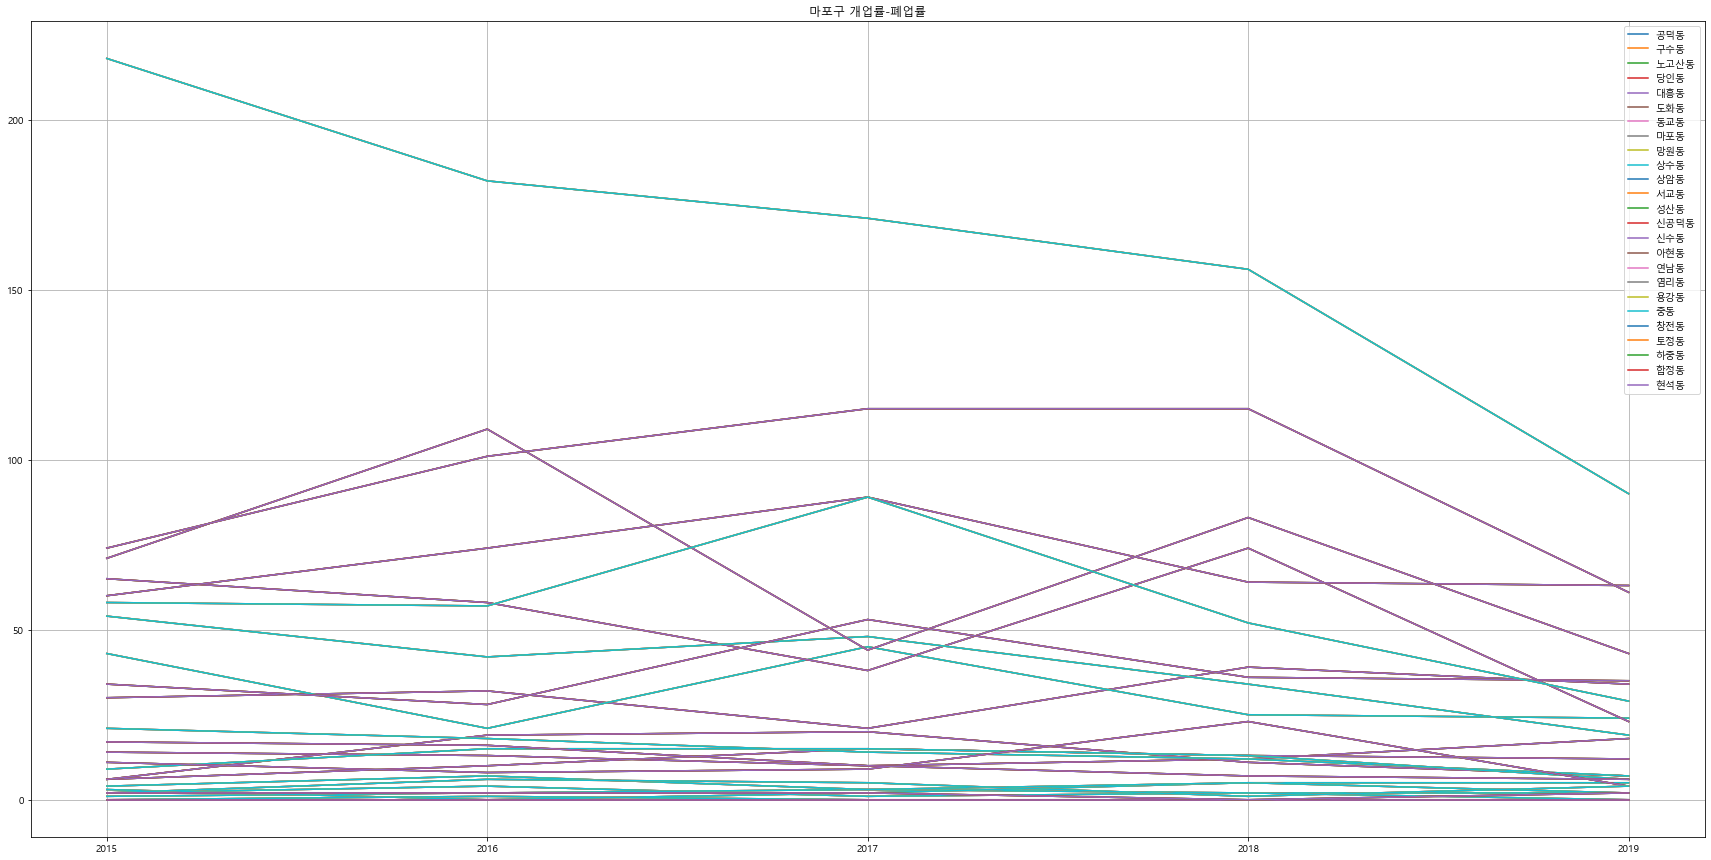

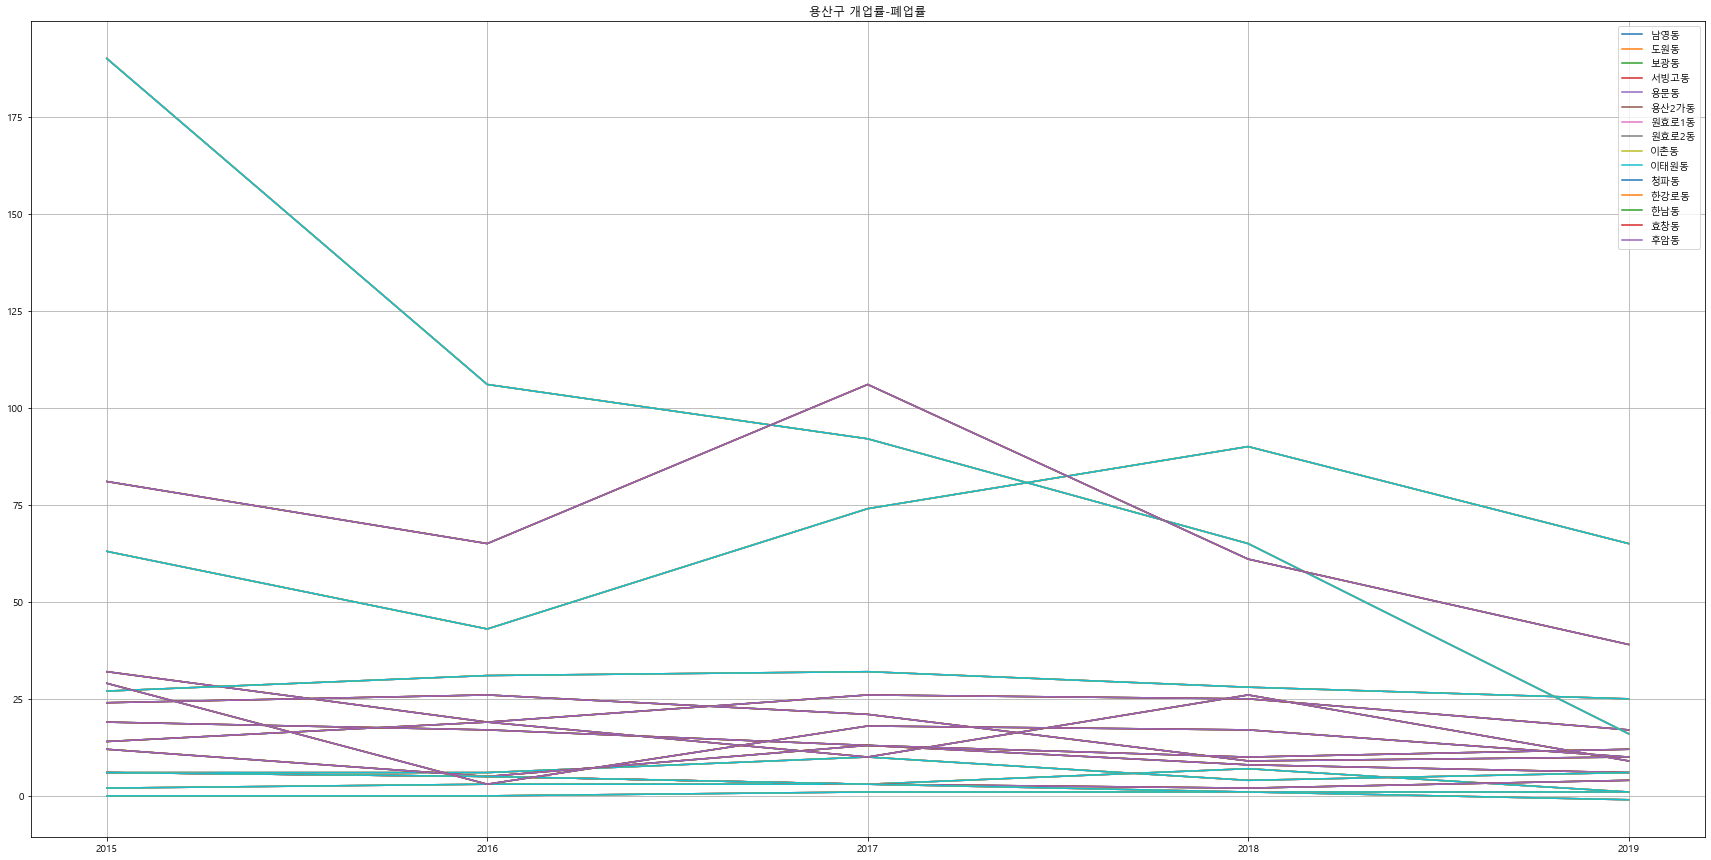

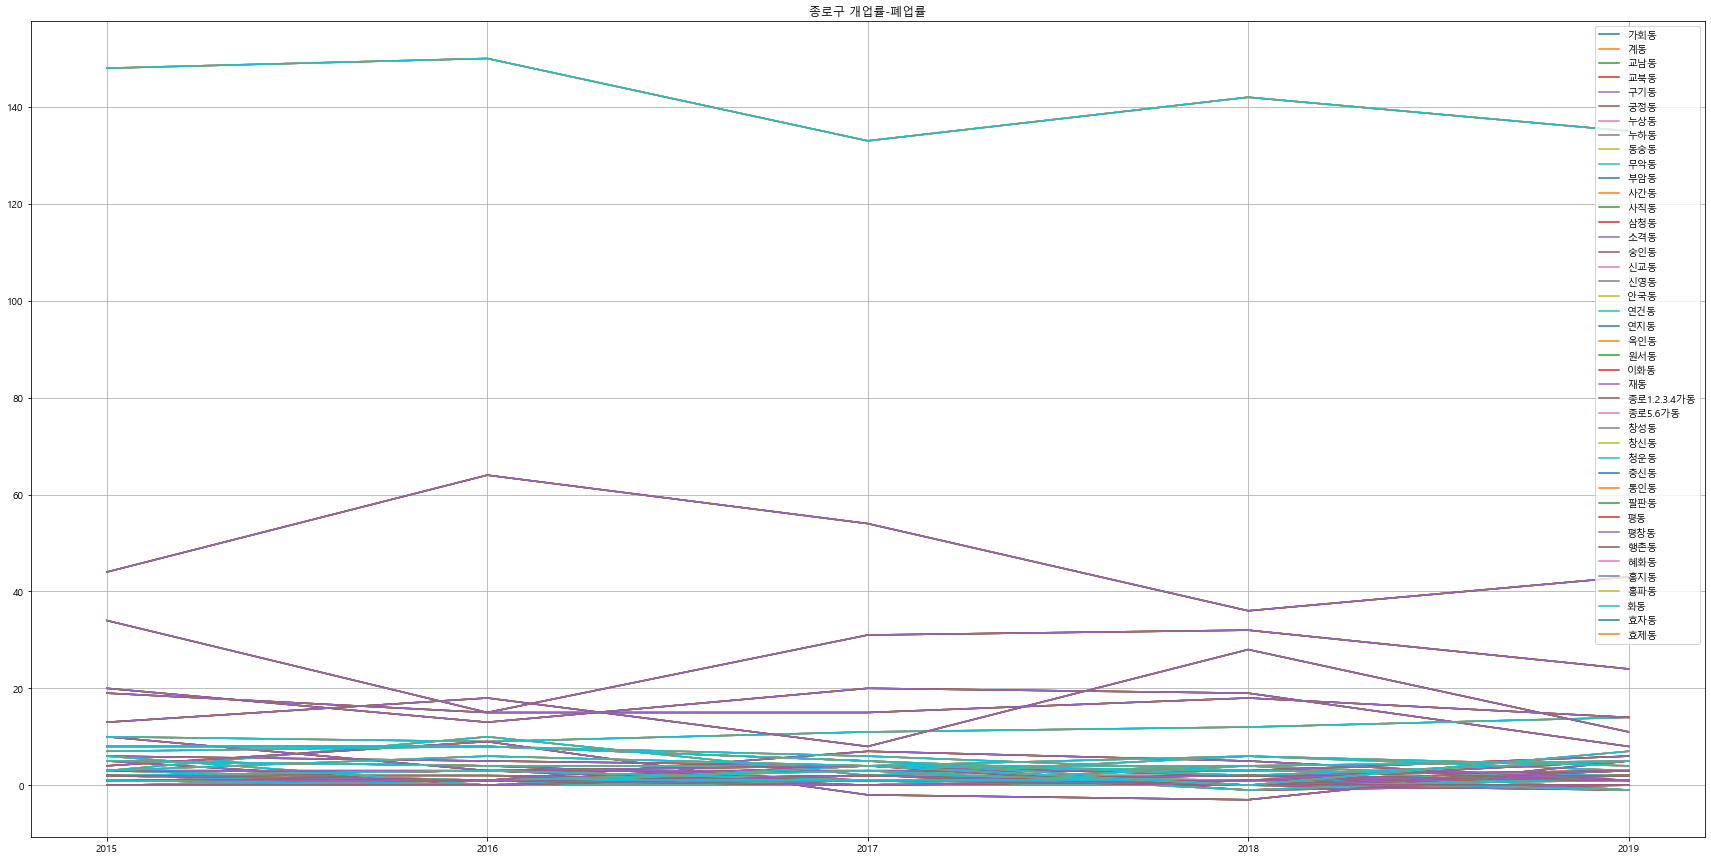

In [70]:
plt.figure(figsize=(15,6))
drawgraphgu_year('마포구')
drawgraphgu_year('용산구')
drawgraphgu_year('종로구')

# 용산구, 마포구, 종로구 데이터만 뜯어보기

In [71]:
normal_closed_group_year

normal_open_group_year

df1 = normal_open_group_year.reset_index()
df1

df2 = normal_closed_group_year.reset_index()
df2

df3 = df2.copy()
df3['2015'] = df1['2015']-df2['2015']
df3['2016'] = df1['2016']-df2['2016']
df3['2017'] = df1['2017']-df2['2017']
df3['2018'] = df1['2018']-df2['2018']
df3['2019'] = df1['2019']-df2['2019']
df3

,구,동,2015,2016,2017,2018,2019
0,강남구,개포동,24.4,13.1,16.67,5.95,4.17
1,강남구,논현동,181.0,160.0,154.00,125.00,149.00
2,강남구,대치동,122.0,102.0,77.00,103.00,98.00
3,강남구,도곡동,49.0,34.0,31.00,29.00,31.00
4,강남구,삼성동,104.0,101.0,88.00,69.00,76.00
...,...,...,...,...,...,...,...
274,중랑구,면목동,89.0,77.0,72.00,82.00,77.00
275,중랑구,묵동,36.0,30.0,16.00,21.00,27.00
276,중랑구,상봉동,34.0,29.0,35.00,25.00,30.00
277,중랑구,신내동,30.0,24.0,27.00,11.00,14.00


In [72]:
# 용산구 데이터만 분리
yongsan = df3[df3['구']=='용산구']
yongsan.drop(['구'], axis=1,inplace=True)
yongsan = yongsan.reset_index(drop=True)


C:\Users\dpffp\anaconda3\lib\site-packages\pandas\core\frame.py:3990: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


In [73]:
# 마포구 데이터만 분리
mapo = df3[df3['구']=='마포구']
mapo.drop(['구'], axis=1,inplace=True)
mapo = mapo.reset_index(drop=True)

In [74]:
# 종로구 데이터만 분리
jongro = df3[df3['구']=='종로구']
jongro.drop(['구'], axis=1,inplace=True)
jongro = jongro.reset_index(drop=True)

# 표준편차가 전체 표준편차의 평균보다 큰 값만을 표현
우리는 상권이 5년 내내 번영하는 곳을 보고 싶은 것도 아니고, 애초에 상권이 발달하지 않은 지역을 보고자 하는 것도 아님. 개업률-폐업률이 변동성이 있는 곳을 보고 싶은 것이므로 전체의 표준편차(변동성 지표)보다 큰 값만을 그래프에 표현한다.

In [75]:
#용산구
yongsan_sd = yongsan.std(axis=1)
yongsan_sd_mean = yongsan_sd.mean()
yongsan['sd'] = yongsan_sd
yongsan_sdfiltered = yongsan[yongsan['sd']>=yongsan_sd_mean].sort_values(['sd'],ascending=False)
yongsan_growthrate = [((yongsan_sdfiltered['2019']-yongsan_sdfiltered['2015'])/yongsan_sdfiltered['2015'])*100]

In [76]:
yongsan_sdfiltered

,동,2015,2016,2017,2018,2019,sd
9,이태원동,190.0,106.0,92.0,65.0,16.0,63.813792
12,한남동,81.0,65.0,106.0,61.0,39.0,24.915858
11,한강로동,63.0,43.0,74.0,90.0,65.0,17.131842


In [77]:
yongsan_growthrate

[9    -91.578947
 12   -51.851852
 11     3.174603
 dtype: float64]

In [86]:
yongsan_growthdirection = pd.DataFrame({'동':yongsan_sdfiltered['동'],  
                                        '15-16':((yongsan_sdfiltered['2016']-yongsan_sdfiltered['2015'])/yongsan_sdfiltered['2015'])*100,  
                                        '16-17':((yongsan_sdfiltered['2017']-yongsan_sdfiltered['2016'])/yongsan_sdfiltered['2016'])*100,  
                                       '17-18':((yongsan_sdfiltered['2018']-yongsan_sdfiltered['2017'])/yongsan_sdfiltered['2017'])*100,  
                                       '18-19':((yongsan_sdfiltered['2019']-yongsan_sdfiltered['2018'])/yongsan_sdfiltered['2018'])*100})

In [87]:
yongsan_growthdirection

,동,15-16,16-17,17-18,18-19
9,이태원동,-44.210526,-13.207547,-29.347826,-75.384615
12,한남동,-19.753086,63.076923,-42.452830,-36.065574
11,한강로동,-31.746032,72.093023,21.621622,-27.777778


2020-1분기는 제외하는 게 맞음 (혼자 분기별 데이터이기 때문에 비교할 수 없음)
한강로동, 이태원동, 한남동이 2015년도부터 2020년도까지 지속적으로 쇠퇴하고 있고 2019년과 2015년을 비교했을 때 그나마 유의미한 증가율을 보여줬던 동은 남영동(27%)이다. 청파동도 증가세이다.
하지만 한강로동, 이태원동, 한남동의 감소세에 비해 남영동, 청파동의 증가세가 드라마틱하지 않음
다른 지표들에서도 한강로, 이태원, 한남동이 감소하고 청파동, 남영동이 증가하는지 보고 젠트리피케이션 현상인지 정의해야 함
지도에는 한강로, 이태원, 한남동 - 감소 / 청파동, 남영동 - 증가 이렇게 하면 될듯?

In [78]:
#마포구
mapo_sd = mapo.std(axis=1)
mapo_sd_mean = mapo_sd.mean()
mapo['sd'] = mapo_sd
mapo_sdfiltered = mapo[mapo['sd']>=mapo_sd_mean].sort_values(['sd'],ascending=False)
mapo_growthrate = [((mapo_sdfiltered['2019']-mapo_sdfiltered['2015'])/mapo_sdfiltered['2015'])*100]

In [79]:
mapo_sdfiltered

,동,2015,2016,2017,2018,2019,sd
11,서교동,218.0,182.0,171.0,156.0,90.0,46.976590
10,상암동,71.0,109.0,44.0,83.0,43.0,27.820855
16,연남동,74.0,101.0,115.0,115.0,61.0,24.580480
23,합정동,58.0,57.0,89.0,52.0,29.0,21.412613
6,동교동,65.0,58.0,38.0,74.0,23.0,20.767763
9,상수동,54.0,42.0,48.0,34.0,19.0,13.594116
8,망원동,60.0,74.0,89.0,64.0,63.0,11.853270
5,도화동,43.0,21.0,45.0,25.0,24.0,11.436783


In [80]:
mapo_growthrate

[11   -58.715596
 10   -39.436620
 16   -17.567568
 23   -50.000000
 6    -64.615385
 9    -64.814815
 8      5.000000
 5    -44.186047
 dtype: float64]

In [88]:
mapo_growthdirection = pd.DataFrame({'동':mapo_sdfiltered['동'],  
                                        '15-16':((mapo_sdfiltered['2016']-mapo_sdfiltered['2015'])/mapo_sdfiltered['2015'])*100,  
                                        '16-17':((mapo_sdfiltered['2017']-mapo_sdfiltered['2016'])/mapo_sdfiltered['2016'])*100,  
                                       '17-18':((mapo_sdfiltered['2018']-mapo_sdfiltered['2017'])/mapo_sdfiltered['2017'])*100,  
                                       '18-19':((mapo_sdfiltered['2019']-mapo_sdfiltered['2018'])/mapo_sdfiltered['2018'])*100})
mapo_growthdirection

,동,15-16,16-17,17-18,18-19
11,서교동,-16.513761,-6.043956,-8.771930,-42.307692
10,상암동,53.521127,-59.633028,88.636364,-48.192771
16,연남동,36.486486,13.861386,0.000000,-46.956522
23,합정동,-1.724138,56.140351,-41.573034,-44.230769
6,동교동,-10.769231,-34.482759,94.736842,-68.918919
9,상수동,-22.222222,14.285714,-29.166667,-44.117647
8,망원동,23.333333,20.270270,-28.089888,-1.562500
5,도화동,-51.162791,114.285714,-44.444444,-4.000000


In [81]:
#종로구
jongro_sd = jongro.std(axis=1)
jongro_sd_mean = jongro_sd.mean()
jongro['sd'] = jongro_sd
jongro_sdfiltered = jongro[jongro['sd']>=jongro_sd_mean].sort_values('sd',ascending=False)
jongro_growthrate = [((jongro_sdfiltered['2019']-jongro_sdfiltered['2015'])/jongro_sdfiltered['2015'])*100]

In [82]:
jongro_sdfiltered

,동,2015,2016,2017,2018,2019,sd
12,사직동,44.0,64.0,54.0,36.0,43.0,10.917875
26,종로5.6가동,13.0,18.0,8.0,28.0,11.0,7.829432
36,혜화동,34.0,15.0,31.0,32.0,24.0,7.791020
25,종로1.2.3.4가동,148.0,150.0,133.0,142.0,135.0,7.569676
8,동숭동,20.0,13.0,20.0,19.0,8.0,5.338539
20,연지동,4.0,9.0,-2.0,-3.0,5.0,5.029911
23,이화동,7.0,8.0,5.0,0.0,2.0,3.361547
13,삼청동,3.0,10.0,2.0,6.0,3.0,3.271085
14,소격동,10.0,3.0,3.0,3.0,6.0,3.082207
2,교남동,0.0,1.0,7.0,5.0,1.0,3.033150


In [83]:
jongro_growthrate

[12     -2.272727
 26    -15.384615
 36    -29.411765
 25     -8.783784
 8     -60.000000
 20     25.000000
 23    -71.428571
 13      0.000000
 14    -40.000000
 2            inf
 19    -16.666667
 7     -75.000000
 41    133.333333
 33           inf
 dtype: float64]

In [89]:
jongro_growthdirection = pd.DataFrame({'동':jongro_sdfiltered['동'],  
                                        '15-16':((jongro_sdfiltered['2016']-jongro_sdfiltered['2015'])/jongro_sdfiltered['2015'])*100,  
                                        '16-17':((jongro_sdfiltered['2017']-jongro_sdfiltered['2016'])/jongro_sdfiltered['2016'])*100,  
                                       '17-18':((jongro_sdfiltered['2018']-jongro_sdfiltered['2017'])/jongro_sdfiltered['2017'])*100,  
                                       '18-19':((jongro_sdfiltered['2019']-jongro_sdfiltered['2018'])/jongro_sdfiltered['2018'])*100})
jongro_growthdirection

,동,15-16,16-17,17-18,18-19
12,사직동,45.454545,-15.625000,-33.333333,19.444444
26,종로5.6가동,38.461538,-55.555556,250.000000,-60.714286
36,혜화동,-55.882353,106.666667,3.225806,-25.000000
25,종로1.2.3.4가동,1.351351,-11.333333,6.766917,-4.929577
8,동숭동,-35.000000,53.846154,-5.000000,-57.894737
20,연지동,125.000000,-122.222222,50.000000,-266.666667
23,이화동,14.285714,-37.500000,-100.000000,inf
13,삼청동,233.333333,-80.000000,200.000000,-50.000000
14,소격동,-70.000000,0.000000,0.000000,100.000000
2,교남동,inf,600.000000,-28.571429,-80.000000


# 용산구, 마포구, 종로구 filtered - 그래프 그리기

In [84]:
def drawFilteredDF(df):
    a1 = df.set_index('동').drop('sd', axis=1,inplace=False).transpose()
    plt.figure(figsize=(15,6))
    plt.plot(a1)
    plt.legend(a1.columns.tolist())
    plt.show()

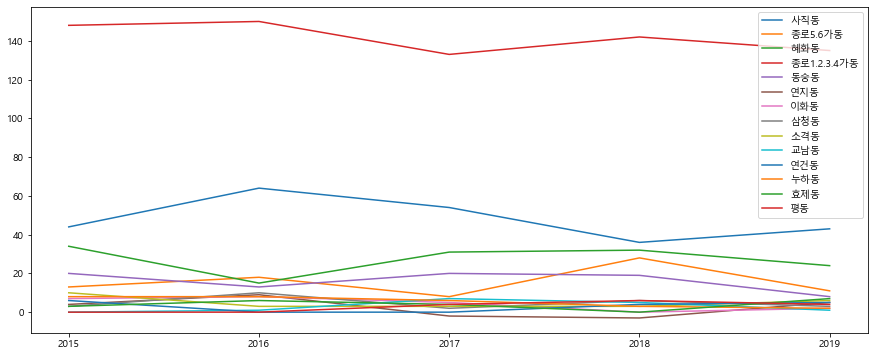

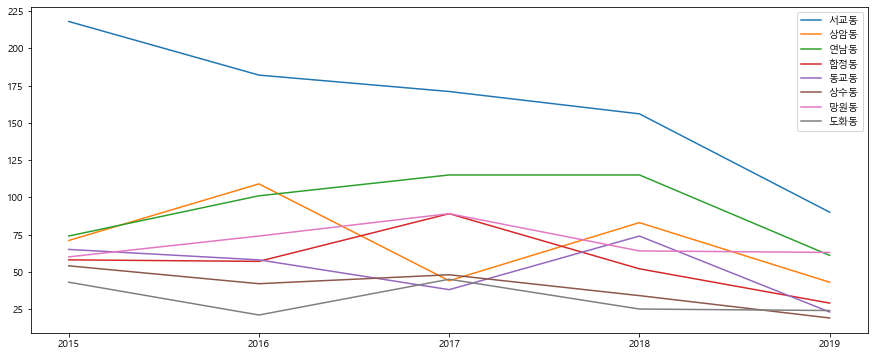

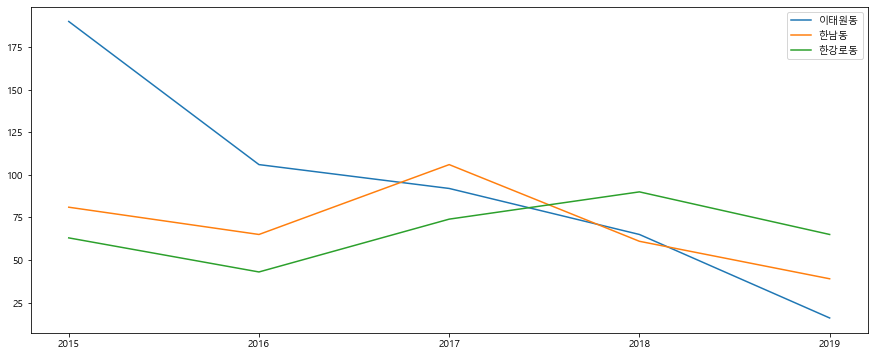

In [85]:
drawFilteredDF(jongro_sdfiltered)
drawFilteredDF(mapo_sdfiltered)
drawFilteredDF(yongsan_sdfiltered)